In [4]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf
import os  
import json

In [5]:
# Define the ticker for Binance Coin
bnb_ticker = yf.Ticker("BNB-USD")

# Check if the CSV file already exists
if os.path.exists("bnb.csv"):
    bnb = pd.read_csv("bnb.csv", index_col=0)
else:
    bnb = bnb_ticker.history(period="max")
    bnb.to_csv("bnb.csv")
bnb

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,2.053140,2.174230,1.893940,1.990770,19192200,0.0,0.0
2017-11-10 00:00:00+00:00,2.007730,2.069470,1.644780,1.796840,11155000,0.0,0.0
2017-11-11 00:00:00+00:00,1.786280,1.917750,1.614290,1.670470,8178150,0.0,0.0
2017-11-12 00:00:00+00:00,1.668890,1.672800,1.462560,1.519690,15298700,0.0,0.0
2017-11-13 00:00:00+00:00,1.526010,1.735020,1.517600,1.686620,12238800,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-30 00:00:00+00:00,594.972534,601.665039,586.557678,595.026794,1737524745,0.0,0.0
2024-05-31 00:00:00+00:00,595.026794,598.423645,589.774841,593.522339,1590349553,0.0,0.0
2024-06-01 00:00:00+00:00,593.522339,607.582886,592.680603,601.304199,1520074486,0.0,0.0


In [6]:
df = pd.read_csv('bnb.csv')
df.head(5) 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-11-09 00:00:00+00:00,2.05314,2.17423,1.89394,1.99077,19192200,0.0,0.0
1,2017-11-10 00:00:00+00:00,2.00773,2.06947,1.64478,1.79684,11155000,0.0,0.0
2,2017-11-11 00:00:00+00:00,1.78628,1.91775,1.61429,1.67047,8178150,0.0,0.0
3,2017-11-12 00:00:00+00:00,1.66889,1.67280,1.46256,1.51969,15298700,0.0,0.0
4,2017-11-13 00:00:00+00:00,1.52601,1.73502,1.51760,1.68662,12238800,0.0,0.0


In [7]:
df.tail(20)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2379,2024-05-15 00:00:00+00:00,566.707031,587.421509,561.127258,582.074341,1895100260,0.0,0.0
2380,2024-05-16 00:00:00+00:00,582.100159,586.436340,565.762329,569.190247,1911862000,0.0,0.0
2381,2024-05-17 00:00:00+00:00,569.190247,584.666016,568.836731,581.178345,1557134929,0.0,0.0
2382,2024-05-18 00:00:00+00:00,581.178345,581.987183,575.018555,580.481140,1358737176,0.0,0.0
2383,2024-05-19 00:00:00+00:00,580.481567,581.876709,572.369629,574.631653,1298887094,0.0,0.0
2384,2024-05-20 00:00:00+00:00,574.631653,601.563843,569.523560,600.616333,2145457267,0.0,0.0
2385,2024-05-21 00:00:00+00:00,600.601074,629.861084,593.932739,618.420471,3564986916,0.0,0.0
2386,2024-05-22 00:00:00+00:00,618.420471,625.566284,610.546021,614.671875,2138536549,0.0,0.0
2387,2024-05-23 00:00:00+00:00,614.671875,616.524475,581.954102,598.670837,2631566566,0.0,0.0
2388,2024-05-24 00:00:00+00:00,598.670837,604.314880,588.893982,600.225891,1778282198,0.0,0.0


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [9]:
df.drop([ 'Open', 'High', 'Low',  'Dividends', 'Stock Splits', 'Volume'], inplace = True, axis = 1)

In [10]:
df['time'] = pd.to_datetime(df['Date'])
df['formatted_time'] = df['time'].dt.strftime('%d-%m-%Y')
df['formatted_time']

0       09-11-2017
1       10-11-2017
2       11-11-2017
3       12-11-2017
4       13-11-2017
           ...    
2394    30-05-2024
2395    31-05-2024
2396    01-06-2024
2397    02-06-2024
2398    03-06-2024
Name: formatted_time, Length: 2399, dtype: object

In [11]:
df.drop([ 'Date', 'time'], inplace = True, axis = 1)

In [12]:
df

,Close,formatted_time
0,1.990770,09-11-2017
1,1.796840,10-11-2017
2,1.670470,11-11-2017
3,1.519690,12-11-2017
4,1.686620,13-11-2017
...,...,...
2394,595.026794,30-05-2024
2395,593.522339,31-05-2024
2396,601.304199,01-06-2024
2397,603.026611,02-06-2024


In [13]:
import pandas_ta as ta
 
df['SMA'] = ta.sma(df['Close'], length=5) 
df['EMA'] = ta.ema(df['Close'], length=5) 
df['RSI'] = ta.rsi(df['Close'], length=14) 

In [14]:
df.fillna(0, inplace = True)

In [15]:
new_df = df.copy()

In [16]:
X = new_df.drop(['Close', 'formatted_time'], axis = 1).values
Y = new_df['Close'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [19]:
rf = RandomForestRegressor()
 
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]})

In [20]:
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestRegressor(n_estimators=300)

In [21]:
y_pred_rf = best_rf.predict(X_test)

In [22]:
rf_metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}
print(rf_metrics)


{'RMSE': 8.391978212006002, 'MSE': 70.42529831078346, 'MAE': 3.1315408361678334, 'R2': 0.9978656934211031}


In [23]:
data = df [len(df) - 15:]

In [24]:
for i in range(2):
    sma = ta.sma(data['Close'], length=5).iloc[-1]
    ema = ta.ema(data['Close'], length=5).iloc[-1]
    rsi = ta.rsi(data['Close'], length=14).iloc[-1]
    # sma_5, ema_5, rsi_14 = scaler.fit_transform(np.array([sma, ema, rsi]).reshape(-1, 1))
    # new_close = best_rf.predict([[0.163528, 0.0, 0.0, 0.0, 1.0, 0.0, sma_5[0], ema_5[0], rsi_14[0]]])
    new_close = best_rf.predict([[sma, ema, rsi]])
    print(new_close)
    new_row = pd.DataFrame({"Close": new_close, "formatted_time" : "0", "SMA" : sma, "EMA" : ema, "RSI" : rsi})
    data = pd.concat([data, new_row], ignore_index= True)
    

[630.72746826]
[646.38634766]


In [25]:
import pickle 
with open('bnb.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

C:\Users\SUBRAT\AppData\Local\Temp\ipykernel_23720\2604539629.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


                          Date       Close         SMA         EMA        RSI
2391 2024-05-27 00:00:00+00:00  603.526428         NaN         NaN        NaN
2392 2024-05-28 00:00:00+00:00  601.213257         NaN         NaN        NaN
2393 2024-05-29 00:00:00+00:00  594.972046         NaN         NaN        NaN
2394 2024-05-30 00:00:00+00:00  595.026794         NaN         NaN        NaN
2395 2024-05-31 00:00:00+00:00  593.522339         NaN         NaN        NaN
2396 2024-06-01 00:00:00+00:00  601.304199         NaN         NaN        NaN
2397 2024-06-02 00:00:00+00:00  603.026611         NaN         NaN        NaN
2398 2024-06-03 00:00:00+00:00  624.983276         NaN         NaN        NaN
2399 2024-06-04 00:00:00+00:00  622.309564  603.572644  608.142472  63.819049
2400 2024-06-05 00:00:00+00:00  624.818243  609.029198  612.864836  62.220904


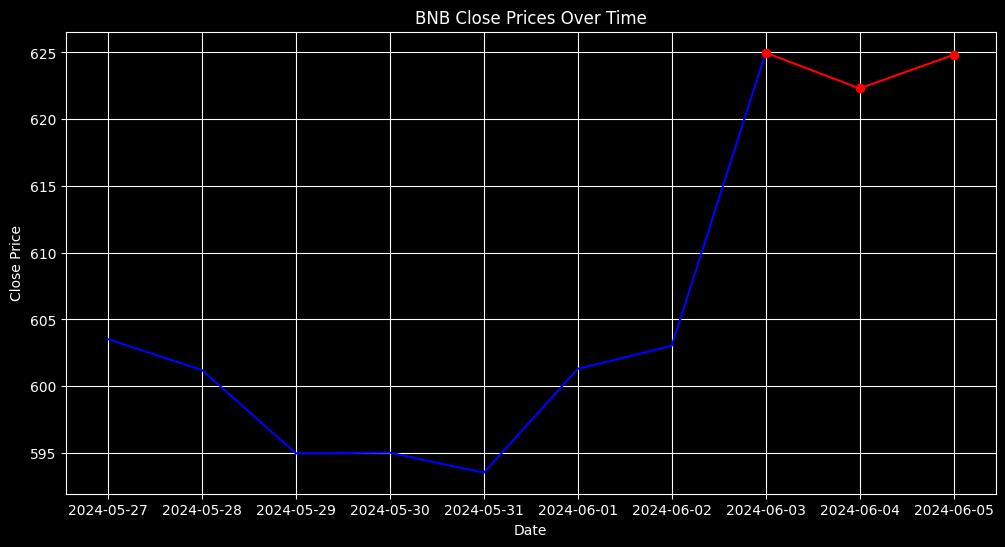

In [26]:
import pandas as pd
import pickle
import pandas_ta as ta
from datetime import timedelta
import matplotlib.pyplot as plt

def file(Type):
    if Type == 'bnb':
        df = pd.read_csv('bnb.csv', usecols=['Date', 'Close'])
        with open('bnb.pkl', 'rb') as f:
            model = pickle.load(f)
        df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
        for i in range(2):
            sma = ta.sma(df['Close'], length=5).iloc[-1]
            ema = ta.ema(df['Close'], length=5).iloc[-1]
            rsi = ta.rsi(df['Close'], length=14).iloc[-1]
            new_close = model.predict([[sma, ema, rsi]])
            new_date = df['Date'].iloc[-1] + timedelta(days=1)
            new_row = {
                "Date": new_date,
                "Close": new_close[0],  # Assuming the model returns an array
                "SMA": sma,
                "EMA": ema,
                "RSI": rsi
            }
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        last_10_days = df.tail(10)
        print(last_10_days)
        
        # Plotting the graph
        plt.style.use('dark_background')
        plt.figure(figsize=(12, 6))
        # Plot all but the last two points
        plt.plot(last_10_days['Date'][:-2], last_10_days['Close'][:-2], linestyle='-', color='b')
        
        # Highlight the last two points
        plt.plot(last_10_days['Date'][-3:], last_10_days['Close'][-3:], linestyle='-', color='r', marker='o')
        plt.title('BNB Close Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.grid(True)  
        plt.show()

# Call the function with 'bnb'
file('bnb')
